In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [154]:
connection = sqlite3.connect("data/chinook.db")
cursor = connection.cursor()

sql_query = """
SELECT name FROM sqlite_master WHERE type='table';
"""

tables = pd.read_sql_query(sql_query,connection)
print(tables)

sql_query = """
SELECT g.name AS genre, AVG(t.Milliseconds) AS average
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.name
ORDER BY average DESC;
"""

join_result = pd.read_sql_query(sql_query, connection)
print(join_result)

               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1
                 genre       average
0     Sci Fi & Fantasy  2.911783e+06
1      Science Fiction  2.625549e+06
2                Drama  2.575284e+06
3             TV Shows  2.145041e+06
4               Comedy  1.585264e+06
5                Metal  3.097494e+05
6    Electronica/Dance  3.029858e+05
7          Heavy Metal  2.974529e+05
8            Classical  2.938676e+05
9                 Jazz  2.917554e+05
10                Rock  2.839100e+05
11               Blues  2.703598e+05
12         Alternative  2.640585e+05
13              Reggae  2.471778e+05
14          Soundtrack  2.443709e+05
15  Alternative & Punk  2.343538e+05
16               Latin  2.328593e+05
17                 Pop  2.290341e+05
18               

## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [157]:
# slides from 13-17

query = """
SELECT 
  t.name as track,
  t.composer,
  t.unitprice,
  g.name as genre,
  a.title as album,
  ar.name as artist
FROM 
  tracks t
JOIN genres g ON t.genreid = g.genreid
JOIN albums a ON t.albumid = a.albumid
JOIN artists ar ON a.artistid = ar.artistid;
"""

sql_df = pd.read_sql_query(query, connection)
sql_df.head()

,track,Composer,UnitPrice,genre,album,artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [159]:
csv_df = pd.read_csv('data/chinook_data.csv')
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [161]:
xlsx_df = pd.read_excel("data/chinook_data.xlsx")
xlsx_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


In [163]:
itunes_df = pd.concat([csv_df, xlsx_df, sql_df])
itunes_df

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist,track,genre,album,artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492.0,211743651.0,1.99,TV Shows,"Lost, Season 1",Lost,NaN,NaN,NaN,NaN
1,Beira Mar,Gilberto Gil,295444.0,9597994.0,0.99,Latin,Unplugged,Eric Clapton,NaN,NaN,NaN,NaN
2,Brasil,"Milton Nascimento, Fernando Brant",155428.0,5252560.0,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento,NaN,NaN,NaN,NaN
3,Ben Franklin,NaN,1271938.0,264168080.0,1.99,Comedy,"The Office, Season 3",The Office,NaN,NaN,NaN,NaN
4,O Último Romântico (Ao Vivo),NaN,231993.0,7692697.0,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3498,NaN,None,NaN,NaN,0.99,NaN,NaN,NaN,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,NaN,Franz Schubert,NaN,NaN,0.99,NaN,NaN,NaN,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,NaN,Claudio Monteverdi,NaN,NaN,0.99,NaN,NaN,NaN,"L'orfeo, Act 3, Sinfonia (Orchestra)",Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,NaN,Wolfgang Amadeus Mozart,NaN,NaN,0.99,NaN,NaN,NaN,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Classical,Mozart: Chamber Music,Nash Ensemble


In [165]:
# 18-22
itunes_df.shape

(4021, 12)

In [167]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 0 to 3502
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         518 non-null    object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  518 non-null    float64
 3   Bytes         518 non-null    float64
 4   UnitPrice     4021 non-null   float64
 5   Genre         518 non-null    object 
 6   Album         518 non-null    object 
 7   Artist        518 non-null    object 
 8   track         3503 non-null   object 
 9   genre         3503 non-null   object 
 10  album         3503 non-null   object 
 11  artist        3503 non-null   object 
dtypes: float64(3), object(9)
memory usage: 408.4+ KB


In [169]:
itunes_df.isna().sum()

Track           3503
Composer        1113
Milliseconds    3503
Bytes           3503
UnitPrice          0
Genre           3503
Album           3503
Artist          3503
track            518
genre            518
album            518
artist           518
dtype: int64

In [171]:
itunes_df.notna().sum()

Track            518
Composer        2908
Milliseconds     518
Bytes            518
UnitPrice       4021
Genre            518
Album            518
Artist           518
track           3503
genre           3503
album           3503
artist          3503
dtype: int64

In [173]:
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,5.180000e+02,5.180000e+02,4021.000000
mean,3.868336e+05,3.040734e+07,1.050184
std,5.258469e+05,9.602387e+07,0.237857
min,4.884000e+03,1.612660e+05,0.990000
25%,2.049758e+05,6.493416e+06,0.990000
50%,2.526950e+05,8.098298e+06,0.990000
75%,3.225330e+05,1.010645e+07,0.990000
max,2.935894e+06,5.701522e+08,1.990000


In [175]:
itunes_df.describe(include='all')

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist,track,genre,album,artist
count,518,2908,5.180000e+02,5.180000e+02,4021.000000,518,518,518,3503,3503,3503,3503
unique,495,852,NaN,NaN,NaN,23,231,127,3257,25,347,204
top,Surrender,Steve Harris,NaN,NaN,NaN,Rock,Body Count,Iron Maiden,Wrathchild,Rock,Greatest Hits,Iron Maiden
freq,3,97,NaN,NaN,NaN,201,8,36,5,1297,57,213
mean,NaN,NaN,3.868336e+05,3.040734e+07,1.050184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.258469e+05,9.602387e+07,0.237857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,4.884000e+03,1.612660e+05,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.049758e+05,6.493416e+06,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.526950e+05,8.098298e+06,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.225330e+05,1.010645e+07,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
# itunes_df.corr()

numeric_df = itunes_df.select_dtypes(include='number')
numeric_df.corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.942266,0.956721
Bytes,0.942266,1.000000,0.941954
UnitPrice,0.956721,0.941954,1.000000


In [179]:
itunes_df['Genre'].mode()

0    Rock
Name: Genre, dtype: object

In [181]:
itunes_df['Genre'].value_counts()

Genre
Rock                  201
Latin                  77
Alternative & Punk     61
Metal                  46
Jazz                   30
TV Shows               12
Classical              11
Blues                  11
R&B/Soul                8
Drama                   7
Soundtrack              7
Reggae                  6
Hip Hop/Rap             5
Electronica/Dance       5
Alternative             5
Sci Fi & Fantasy        5
World                   4
Easy Listening          4
Comedy                  3
Pop                     3
Heavy Metal             3
Bossa Nova              2
Science Fiction         2
Name: count, dtype: int64

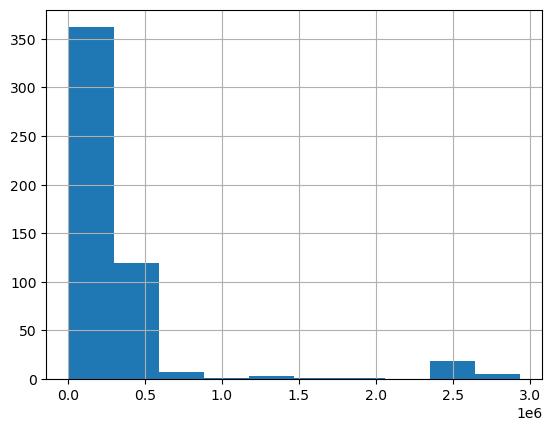

In [183]:
itunes_df['Milliseconds'].hist()
plt.show()

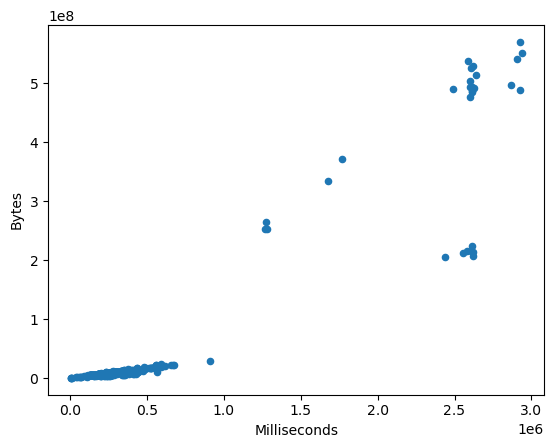

In [185]:
itunes_df.plot.scatter(x='Milliseconds', y='Bytes')
plt.show()

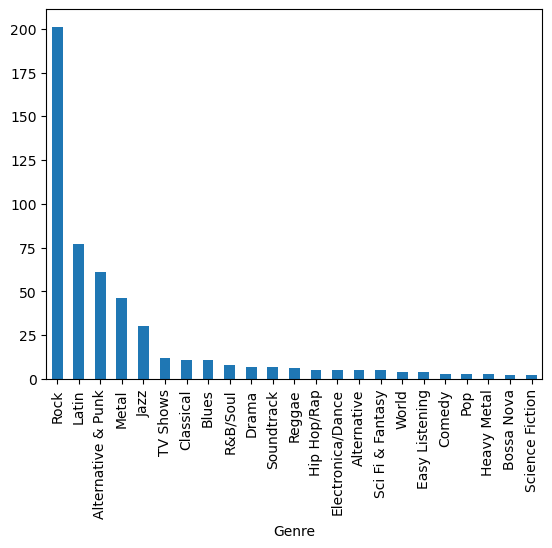

In [187]:
itunes_df['Genre'].value_counts().plot.bar()
plt.show()

In [189]:
# 23-27

itunes_df.drop('Composer', axis=1, inplace=True)
itunes_df.columns

Index(['Track', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre', 'Album',
       'Artist', 'track', 'genre', 'album', 'artist'],
      dtype='object')

In [225]:
only_music = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'SciFi & Fantasy', 'Science Fiction', 'Comedy'])]
only_music

,Track,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist,track,genre,album,artist
1,Beira Mar,295444.0,9597994.0,0.99,Latin,Unplugged,Eric Clapton,NaN,NaN,NaN,NaN
2,Brasil,155428.0,5252560.0,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento,NaN,NaN,NaN,NaN
4,O Último Romântico (Ao Vivo),231993.0,7692697.0,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos,NaN,NaN,NaN,NaN
5,Freewheel Burning,265952.0,8713599.0,0.99,Metal,Living After Midnight,Judas Priest,NaN,NaN,NaN,NaN
6,That's The Way,343431.0,11248455.0,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3498,NaN,Unknown,NaN,0.99,NaN,NaN,NaN,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,NaN,Unknown,NaN,0.99,NaN,NaN,NaN,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,NaN,Unknown,NaN,0.99,NaN,NaN,NaN,"L'orfeo, Act 3, Sinfonia (Orchestra)",Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,NaN,Unknown,NaN,0.99,NaN,NaN,NaN,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Classical,Mozart: Chamber Music,Nash Ensemble


In [199]:
itunes_df.dropna(thresh=2, inplace=True)
itunes_df.shape

(4021, 11)

In [213]:
itunes_df['Milliseconds'].fillna('Unknown', inplace=True)
(itunes_df['Milliseconds'] =='Unknown').sum()

3503

In [227]:
itunes_df['UnitPrice'].fillna(itunes_df['UnitPrice'].mode(),inplace=True)

In [239]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df

itunes_df_clean = remove_outliers(itunes_df, 'Bytes')

In [245]:
itunes_df.duplicated().sum()

20

In [247]:
itunes_df.drop_duplicates(inplace=True)
itunes_df.duplicated().sum()

0

In [258]:
genre_dict = {'metal': 'Metal', 'met': 'Metal'}
itunes_df['Genre'].replace(genre_dict)

0       TV Shows
1          Latin
2          Latin
3         Comedy
4          Latin
          ...   
3498         NaN
3499         NaN
3500         NaN
3501         NaN
3502         NaN
Name: Genre, Length: 4001, dtype: object

In [263]:
itunes_df['Genre'] = itunes_df['Genre'].str.upper()
itunes_df['Genre'].value_counts()

Genre
ROCK                  196
LATIN                  75
ALTERNATIVE & PUNK     59
METAL                  45
JAZZ                   27
TV SHOWS               12
CLASSICAL              11
BLUES                  11
R&B/SOUL                8
DRAMA                   7
SOUNDTRACK              7
REGGAE                  6
HIP HOP/RAP             5
ELECTRONICA/DANCE       5
ALTERNATIVE             5
SCI FI & FANTASY        5
COMEDY                  3
POP                     3
EASY LISTENING          3
HEAVY METAL             3
WORLD                   3
BOSSA NOVA              2
SCIENCE FICTION         2
Name: count, dtype: int64

In [265]:
# save

itunes_df.to_excel('itunes_df.xlsx')

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-01-01` to `2024-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [27]:
#Your Solution